In [24]:
!pip install scipy

In [37]:
import numpy as np
import pandas as pd
import scipy as sp #sp.polyfit →　np.polyfit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [4]:
df = pd.read_excel("./01_linear_approximation.xlsx",header=6, index_col=0, sheet_name="Sheet1")

In [5]:
df.head()

,Number
Time[s],
0,98433.561371
10,94203.487920
20,91517.336375
30,86539.457397
40,81777.430583


In [7]:
watt_arr = np.array([0,10,20,40,60,80])
df_all = pd.DataFrame()

for i in range(1,6):
    df = pd.read_excel("./01_linear_approximation.xlsx",header=6,index_col=0,sheet_name="Sheet"+str(i))
    df["W"] = watt_arr[i]
    df_all = pd.concat([df_all,df])

In [8]:
df_all

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10
0,99029.902000,20
10,91712.170320,20


In [13]:
groups = df_all.groupby("W")

In [14]:
df_10w = groups.get_group(10)

In [15]:
df_10w

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10


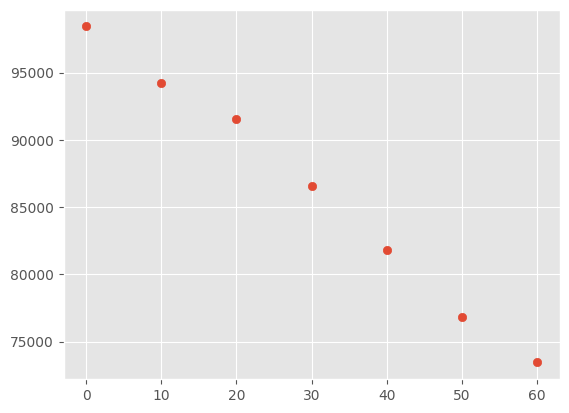

In [16]:
plt.scatter(df_10w.index,df_10w["Number"])

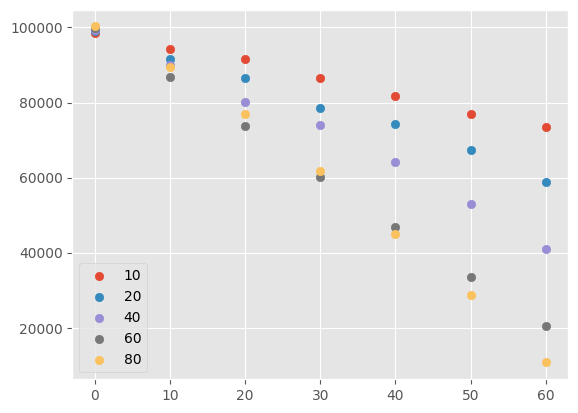

In [20]:
for name,group in groups:
    plt.scatter(group.index ,group["Number"], label=name)
plt.legend(loc = "lower left")

In [28]:
param = np.polyfit(df_10w.index, df_10w["Number"],1) #sp->np

In [29]:
param

array([ -426.39035152, 98902.69506669])

In [31]:
#polyfitにより近似式を抽出し、Wごとの傾き＝殺菌力を確認
p_list = []
p_list.append(0)
for name, group in groups:
    param = np.polyfit(group.index, group["Number"], 1)
    print(name, -param[0])
    p_list.append(-param[0])

10 426.3903515160272
20 649.8899826428571
40 947.7399997936388
60 1327.857142857142
80 1508.1041964947824


In [32]:
p_list

[0,
 np.float64(426.3903515160272),
 np.float64(649.8899826428571),
 np.float64(947.7399997936388),
 np.float64(1327.857142857142),
 np.float64(1508.1041964947824)]

Text(0, 0.5, 'Efficiency')

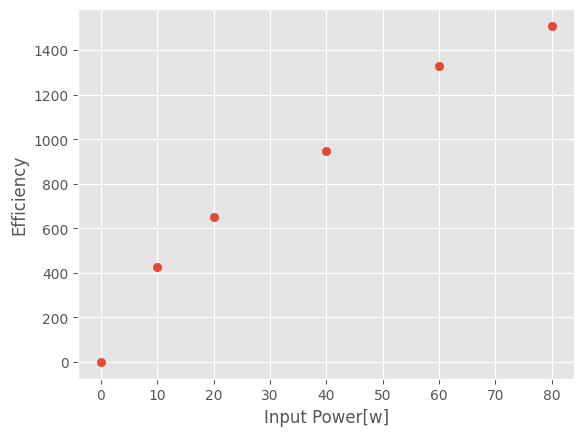

In [33]:
#Wごとの殺菌力をプロット（散布図）
plt.scatter(watt_arr, p_list)
plt.xlabel("Input Power[w]")
plt.ylabel("Efficiency")

In [34]:
a = np.polyfit(watt_arr[:3], p_list[:3], 1)

In [35]:
a

array([32.49449913, 33.81512006])

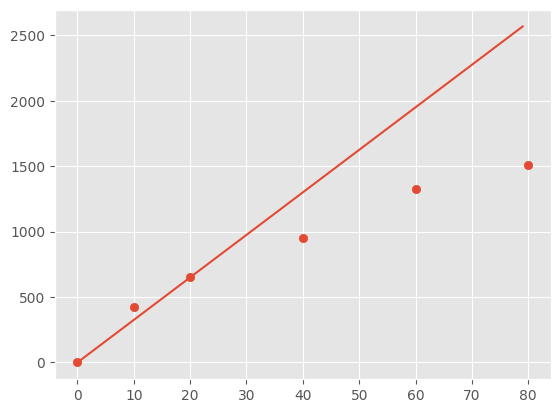

In [36]:
plt.scatter(watt_arr, p_list)
x = np.arange(0,80,1)
plt.plot(x, a[0]*x)